#  Smart Mobile Usage Analyzer for Academic Risk Prediction

This project analyzes students' mobile usage behavior and predicts their
academic risk level using Machine Learning.



## 🔹 Tools & Technologies
- Python
- Google Colab
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 🔹 Dataset Creation
A synthetic dataset is generated to represent student mobile usage behavior.


In [ ]:
np.random.seed(42)

data = {
    'Screen_Time_hr': np.random.uniform(2, 10, 200),
    'Social_Media_hr': np.random.uniform(1, 6, 200),
    'Study_hr': np.random.uniform(0.5, 6, 200),
    'Sleep_hr': np.random.uniform(4, 9, 200),
    'Gaming_hr': np.random.uniform(0, 4, 200),
    'Attendance_%': np.random.uniform(60, 100, 200)
}

df = pd.DataFrame(data)

def risk_level(row):
    if row['Screen_Time_hr'] > 7 and row['Study_hr'] < 2:
        return 'High'
    elif row['Screen_Time_hr'] > 5:
        return 'Medium'
    else:
        return 'Low'

df['Risk_Level'] = df.apply(risk_level, axis=1)
df.head()


,Screen_Time_hr,Social_Media_hr,Study_hr,Sleep_hr,Gaming_hr,Attendance_%,Risk_Level
0,4.996321,4.210158,1.067181,4.844675,2.828955,67.405317,Low
1,9.605714,1.420700,5.464041,5.392952,0.610156,81.676038,Medium
2,7.855952,1.808144,3.278888,4.885052,2.305153,94.917833,Medium
3,6.789268,5.492771,5.045516,4.443513,2.426860,89.288995,Medium
4,3.248149,4.032145,2.260273,4.603179,1.696523,92.262446,Low



## 🔹 Exploratory Data Analysis


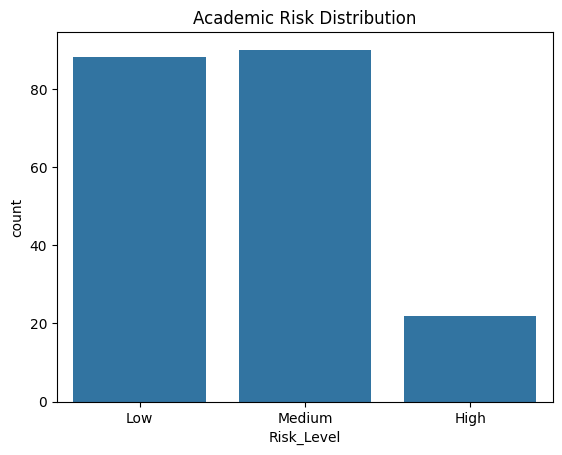

In [ ]:
sns.countplot(x='Risk_Level', data=df)
plt.title("Academic Risk Distribution")
plt.show()


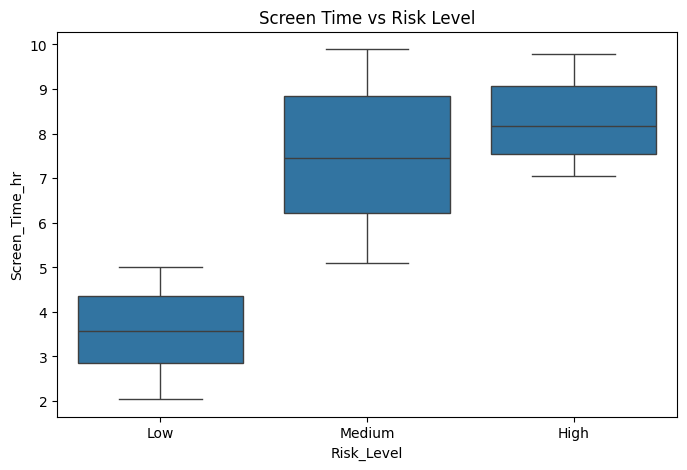

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Risk_Level', y='Screen_Time_hr', data=df)
plt.title("Screen Time vs Risk Level")
plt.show()


##  Data Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Risk_Level'] = le.fit_transform(df['Risk_Level'])

X = df.drop('Risk_Level', axis=1)
y = df['Risk_Level']


## 🔹 Train-Test Split


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 🔹 Model Training (Random Forest)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## 🔹 Model Evaluation



In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.925
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.89      1.00      0.94        16
           2       0.94      0.89      0.92        19

    accuracy                           0.93        40
   macro avg       0.94      0.90      0.92        40
weighted avg       0.93      0.93      0.92        40



## 🔹 Prediction for New Student



In [ ]:
sample_df = pd.DataFrame(
    [[8, 4, 1.5, 5, 3, 65]],
    columns=X.columns
)

prediction = model.predict(sample_df)

print("Predicted Academic Risk:",
      le.inverse_transform(prediction))



Predicted Academic Risk: ['High']


## 🔹 Recommendation System


In [ ]:
def recommendation(screen_time, study_hours, sleep):
    if screen_time > 7:
        return "Reduce screen time and increase study hours"
    elif sleep < 6:
        return "Improve sleep schedule"
    else:
        return "Maintain current healthy habits"

recommendation(8, 1.5, 5)


'Reduce screen time and increase study hours'

## 🔹 Conclusion
The Smart Mobile Usage Analyzer successfully predicts academic risk
and provides meaningful recommendations using machine learning.
